In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('ggplot')

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv(r"C:\Users\91891\Downloads\2-Attrition+Rate+Django+code\2-Attrition Rate Django code\Table_1.csv")
df.head()

,table id,name,phone number,Location,Emp. Group,Function,Gender,Tenure,Tenure Grp.,Experience (YY.MM),Marital Status,Age in YY.,Hiring Source,Promoted/Non Promoted,Job Role Match,Stay/Left
0,1,sid,9876544345,Pune,B2,Operation,Male,0.00,< =1,6.08,Single,27.12,Direct,Non Promoted,Yes,Left
1,2,sid,9876544345,Noida,B7,Support,Male,0.00,< =1,13.00,Marr.,38.08,Direct,Promoted,No,Stay
2,3,sid,9876544345,Bangalore,B3,Operation,Male,0.01,< =1,16.05,Marr.,36.04,Direct,Promoted,Yes,Stay
3,4,sid,9876544345,Noida,B2,Operation,Male,0.01,< =1,6.06,Marr.,32.07,Direct,Promoted,Yes,Stay
4,5,sid,9876544345,Lucknow,B2,Operation,Male,0.00,< =1,7.00,Marr.,32.05,Direct,Non Promoted,Yes,Stay


In [4]:
print(f'The shape of the data is {df.shape}')

The shape of the data is (902, 16)


In [5]:
# Checking the null values in the data
df.isna().sum()

table id                 0
name                     0
phone number             0
Location                 0
Emp. Group               0
Function                 0
Gender                   0
Tenure                   0
Tenure Grp.              0
Experience (YY.MM)       4
Marital Status           0
Age in YY.               0
Hiring Source            0
Promoted/Non Promoted    0
Job Role Match           2
Stay/Left                0
dtype: int64

In [6]:
df.dropna(axis=0, inplace=True)

In [7]:
df.isna().sum()

table id                 0
name                     0
phone number             0
Location                 0
Emp. Group               0
Function                 0
Gender                   0
Tenure                   0
Tenure Grp.              0
Experience (YY.MM)       0
Marital Status           0
Age in YY.               0
Hiring Source            0
Promoted/Non Promoted    0
Job Role Match           0
Stay/Left                0
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 896 entries, 0 to 901
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   table id               896 non-null    int64  
 1   name                   896 non-null    object 
 2   phone number           896 non-null    int64  
 3   Location               896 non-null    object 
 4   Emp. Group             896 non-null    object 
 5   Function               896 non-null    object 
 6   Gender                 896 non-null    object 
 7   Tenure                 896 non-null    float64
 8   Tenure Grp.            896 non-null    object 
 9   Experience (YY.MM)     896 non-null    float64
 10  Marital Status         896 non-null    object 
 11  Age in YY.             896 non-null    float64
 12  Hiring Source          896 non-null    object 
 13  Promoted/Non Promoted  896 non-null    object 
 14  Job Role Match         896 non-null    object 
 15  Stay/L

In [9]:
print(df.describe()),print('-'*100), print(df.describe(include=['object']))

         table id  phone number      Tenure  Experience (YY.MM)  Age in YY.
count  896.000000  8.960000e+02  896.000000          896.000000  896.000000
mean   451.245536  9.876544e+09    1.205982            5.161886   29.078795
std    259.236205  0.000000e+00    0.820552            3.478917    4.493532
min      1.000000  9.876544e+09    0.000000            0.030000   21.050000
25%    227.750000  9.876544e+09    0.110000            2.100000   26.050000
50%    451.500000  9.876544e+09    1.060000            4.110000   28.060000
75%    675.250000  9.876544e+09    2.040000            7.030000   31.070000
max    902.000000  9.876544e+09    3.000000           25.080000   52.060000
----------------------------------------------------------------------------------------------------
         name Location Emp. Group   Function Gender  Tenure Grp.  \
count     896      896        896        896     896         896   
unique      7       12         10          3       3           2   
top     Arn

(None, None, None)

In [10]:
# Checking the unique elements of the categorical variables
for i in df.select_dtypes('object').columns:
    print(f'The unique elements in {i} are {df[i].unique()}\n')

The unique elements in name are ['sid' 'shruti' 'Dwane' 'Arnab' 'Papu' 'Shiv' 'Rahul']

The unique elements in Location are ['Pune' 'Noida' 'Bangalore' 'Lucknow' 'Chennai' 'Hyderabad' 'Nagpur'
 'Madurai' 'Mumbai' 'Gurgaon' 'Kolkata' 'Vijayawada']

The unique elements in Emp. Group are ['B2' 'B7' 'B3' 'B1' 'B5' 'B0' 'B4' 'B6' 'C3' 'D2']

The unique elements in Function are ['Operation' 'Support' 'Sales']

The unique elements in Gender  are ['Male' 'Female' 'other']

The unique elements in Tenure Grp. are ['< =1' '> 1 & < =3']

The unique elements in Marital Status are ['Single' 'Marr.' 'Div.' 'NTBD' 'Sep.']

The unique elements in Hiring Source are ['Direct' 'Agency' 'Employee Referral']

The unique elements in Promoted/Non Promoted are ['Non Promoted' 'Promoted']

The unique elements in Job Role Match are ['Yes' 'No']

The unique elements in Stay/Left are ['Left' 'Stay']



# Exploratory Data Analysis

<AxesSubplot:xlabel='Location', ylabel='count'>

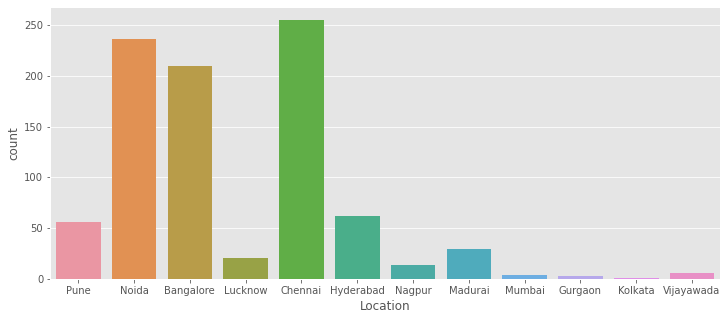

In [11]:
plt.figure(figsize=(12,5))
sns.countplot(df['Location'])


<AxesSubplot:xlabel='Function', ylabel='count'>

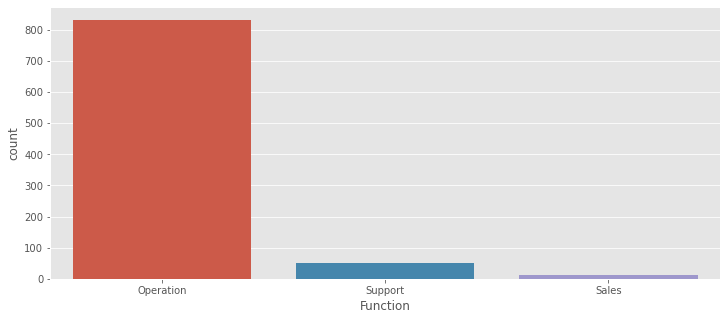

In [12]:
plt.figure(figsize=(12,5))
sns.countplot(df['Function'])

In [13]:
df.columns

Index(['table id', 'name', 'phone number', 'Location', 'Emp. Group',
       'Function', 'Gender ', 'Tenure', 'Tenure Grp.', 'Experience (YY.MM)',
       'Marital Status', 'Age in YY.', 'Hiring Source',
       'Promoted/Non Promoted', 'Job Role Match', 'Stay/Left'],
      dtype='object')

In [14]:
#Lets remove the extra spaces from the names of the columns
df.columns = df.columns.str.replace(' ','')

<AxesSubplot:xlabel='Gender', ylabel='count'>

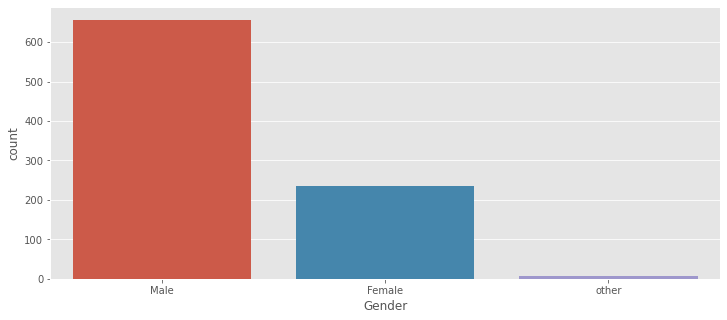

In [15]:
plt.figure(figsize=(12,5))
sns.countplot(df['Gender'])

In [16]:
df.head()

,tableid,name,phonenumber,Location,Emp.Group,Function,Gender,Tenure,TenureGrp.,Experience(YY.MM),MaritalStatus,AgeinYY.,HiringSource,Promoted/NonPromoted,JobRoleMatch,Stay/Left
0,1,sid,9876544345,Pune,B2,Operation,Male,0.00,< =1,6.08,Single,27.12,Direct,Non Promoted,Yes,Left
1,2,sid,9876544345,Noida,B7,Support,Male,0.00,< =1,13.00,Marr.,38.08,Direct,Promoted,No,Stay
2,3,sid,9876544345,Bangalore,B3,Operation,Male,0.01,< =1,16.05,Marr.,36.04,Direct,Promoted,Yes,Stay
3,4,sid,9876544345,Noida,B2,Operation,Male,0.01,< =1,6.06,Marr.,32.07,Direct,Promoted,Yes,Stay
4,5,sid,9876544345,Lucknow,B2,Operation,Male,0.00,< =1,7.00,Marr.,32.05,Direct,Non Promoted,Yes,Stay


<AxesSubplot:xlabel='TenureGrp.', ylabel='count'>

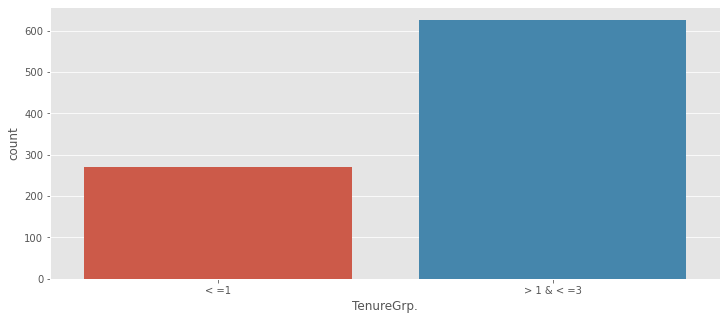

In [17]:
plt.figure(figsize=(12,5))
sns.countplot(df['TenureGrp.'])

<AxesSubplot:xlabel='Experience(YY.MM)'>

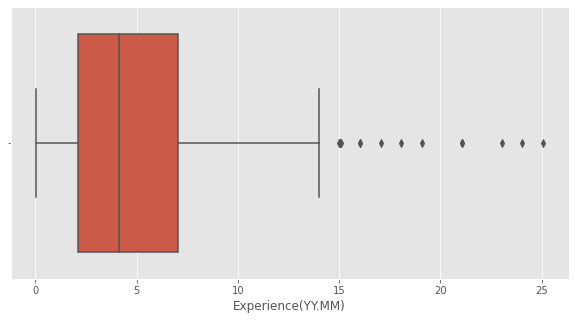

In [18]:
plt.figure(figsize=(10,5))
sns.boxplot(df['Experience(YY.MM)'])

<AxesSubplot:xlabel='Promoted/NonPromoted', ylabel='count'>

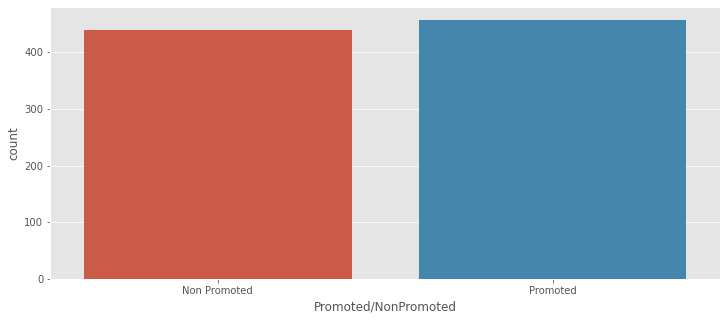

In [19]:
plt.figure(figsize=(12,5))
sns.countplot(df['Promoted/NonPromoted'])

In [20]:
df_locationwise_attrition = df.groupby(['Location', 'Stay/Left'])['name'].agg('count').reset_index()
df_locationwise_attrition.columns = ['Location', 'Stay/Left', 'counts']
df_locationwise_attrition.head()

,Location,Stay/Left,counts
0,Bangalore,Left,76
1,Bangalore,Stay,134
2,Chennai,Left,83
3,Chennai,Stay,172
4,Gurgaon,Stay,3


In [21]:
df_locationwise_attrition['%'] = 100 * df_locationwise_attrition['counts'] / df_locationwise_attrition.groupby('Location')['counts'].transform('sum')
df_locationwise_attrition['%']=df_locationwise_attrition['%'].round()
df_locationwise_attrition.head()

,Location,Stay/Left,counts,%
0,Bangalore,Left,76,36.0
1,Bangalore,Stay,134,64.0
2,Chennai,Left,83,33.0
3,Chennai,Stay,172,67.0
4,Gurgaon,Stay,3,100.0


Text(0.5, 1.0, 'Locationwise Attrition in terms of Percentage')

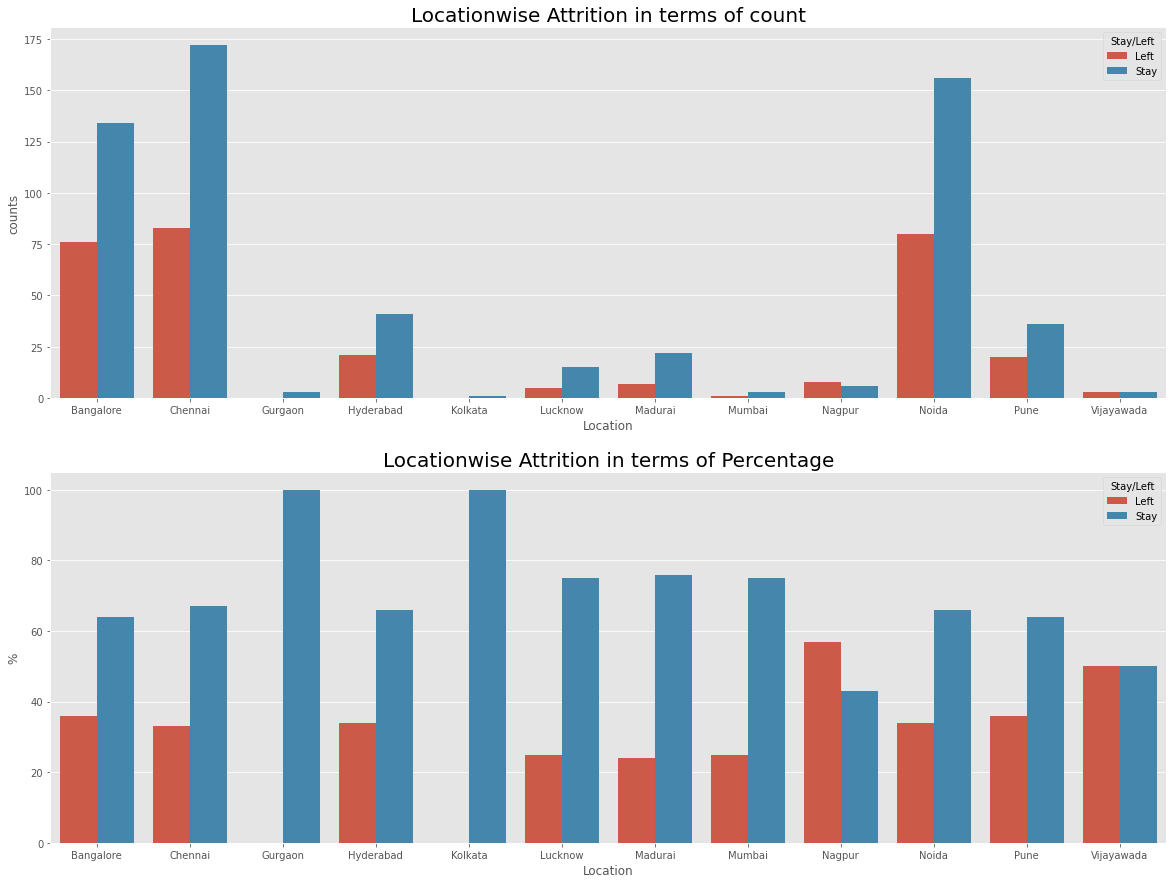

In [22]:
plt.figure(figsize = (20,15))
plt.subplot(2,1,1)
sns.barplot(x=df_locationwise_attrition['Location'], y=df_locationwise_attrition['counts'], hue = df_locationwise_attrition['Stay/Left']).set_title('Locationwise Attrition in terms of count', fontsize=20)
plt.subplot(2,1,2)
sns.barplot(x=df_locationwise_attrition['Location'], y=df_locationwise_attrition['%'], hue = df_locationwise_attrition['Stay/Left']).set_title('Locationwise Attrition in terms of Percentage', fontsize=20)

<b>The above plot shows that Nagpur and Vijaywada has the worst attrition rate</b>

In [23]:
# Lets check the attrition rate in terms of Promoted/NonPromoted
df_Promoted_NonPromotedwise_attrition = df.groupby(['Promoted/NonPromoted', 'Stay/Left'])['name'].agg('count').reset_index()
df_Promoted_NonPromotedwise_attrition.columns = ['Promoted/NonPromoted', 'Stay/Left', 'counts']
df_Promoted_NonPromotedwise_attrition.head()
# Calcuate the prcentage
df_Promoted_NonPromotedwise_attrition['%'] = 100 * df_Promoted_NonPromotedwise_attrition['counts'] / df_Promoted_NonPromotedwise_attrition.groupby('Promoted/NonPromoted')['counts'].transform('sum')
df_Promoted_NonPromotedwise_attrition['%']=df_Promoted_NonPromotedwise_attrition['%'].round()
df_Promoted_NonPromotedwise_attrition

,Promoted/NonPromoted,Stay/Left,counts,%
0,Non Promoted,Left,121,28.0
1,Non Promoted,Stay,318,72.0
2,Promoted,Left,183,40.0
3,Promoted,Stay,274,60.0


Text(0.5, 1.0, 'Promoted/NonPromoted Attrition in terms of %')

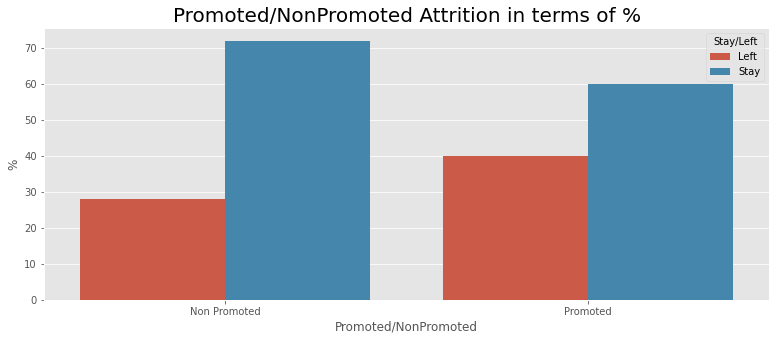

In [24]:
plt.figure(figsize = (13,5))
sns.barplot(x=df_Promoted_NonPromotedwise_attrition['Promoted/NonPromoted'], y=df_Promoted_NonPromotedwise_attrition['%'], hue = df_Promoted_NonPromotedwise_attrition['Stay/Left']).set_title('Promoted/NonPromoted Attrition in terms of %', fontsize=20)

<b>The above plot shows that higher percentage of Promoted people are leaving the company. </b>

In [25]:
# Lets check the attrition rate in terms of Function
df_Functionwise_attrition = df.groupby(['Function', 'Stay/Left'])['name'].agg('count').reset_index()
df_Functionwise_attrition.columns = ['Function', 'Stay/Left', 'counts']
df_Functionwise_attrition.head()
# Calcuate the prcentage
df_Functionwise_attrition['%'] = 100 * df_Functionwise_attrition['counts'] / df_Functionwise_attrition.groupby('Function')['counts'].transform('sum')
df_Functionwise_attrition['%']=df_Functionwise_attrition['%'].round()
df_Functionwise_attrition

,Function,Stay/Left,counts,%
0,Operation,Left,280,34.0
1,Operation,Stay,552,66.0
2,Sales,Left,4,33.0
3,Sales,Stay,8,67.0
4,Support,Left,20,38.0
5,Support,Stay,32,62.0


Text(0.5, 1.0, 'Functionwise Attrition in terms of %')

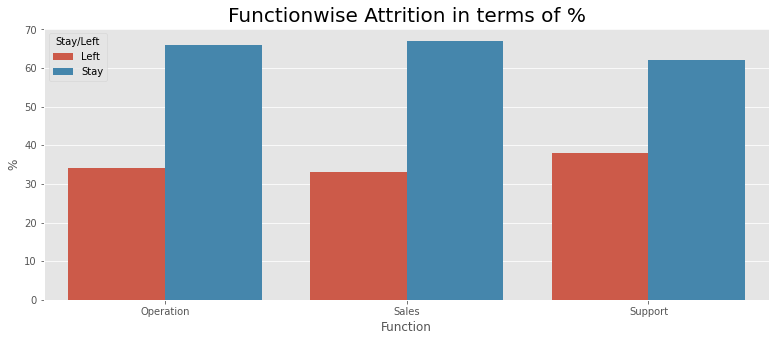

In [26]:
plt.figure(figsize = (13,5))
sns.barplot(x=df_Functionwise_attrition['Function'], y=df_Functionwise_attrition['%'], hue = df_Functionwise_attrition['Stay/Left']).set_title('Functionwise Attrition in terms of %', fontsize=20)

<b>The above plot shows that higher percentage of people in the Support Function are leaving the company. </b>

In [27]:
df.columns

Index(['tableid', 'name', 'phonenumber', 'Location', 'Emp.Group', 'Function',
       'Gender', 'Tenure', 'TenureGrp.', 'Experience(YY.MM)', 'MaritalStatus',
       'AgeinYY.', 'HiringSource', 'Promoted/NonPromoted', 'JobRoleMatch',
       'Stay/Left'],
      dtype='object')

In [28]:
df.groupby(['TenureGrp.', 'Stay/Left'])['name'].agg('count')

TenureGrp.  Stay/Left
< =1        Left          97
            Stay         173
> 1 & < =3  Left         207
            Stay         419
Name: name, dtype: int64

In [29]:
# Lets check the attrition rate in terms of TenureGroup
df_TenureGroup_attrition = df.groupby(['TenureGrp.', 'Stay/Left'])['name'].agg('count').reset_index()
df_TenureGroup_attrition.columns = ['TenureGrp.', 'Stay/Left', 'counts']
df_TenureGroup_attrition.head()
# Calcuate the prcentage
df_TenureGroup_attrition['%'] = 100 * df_TenureGroup_attrition['counts'] / df_TenureGroup_attrition.groupby('TenureGrp.')['counts'].transform('sum')
df_TenureGroup_attrition['%']=df_TenureGroup_attrition['%'].round()
df_TenureGroup_attrition

,TenureGrp.,Stay/Left,counts,%
0,< =1,Left,97,36.0
1,< =1,Stay,173,64.0
2,> 1 & < =3,Left,207,33.0
3,> 1 & < =3,Stay,419,67.0


Text(0.5, 1.0, 'TenureGroupwise Attrition in terms of %')

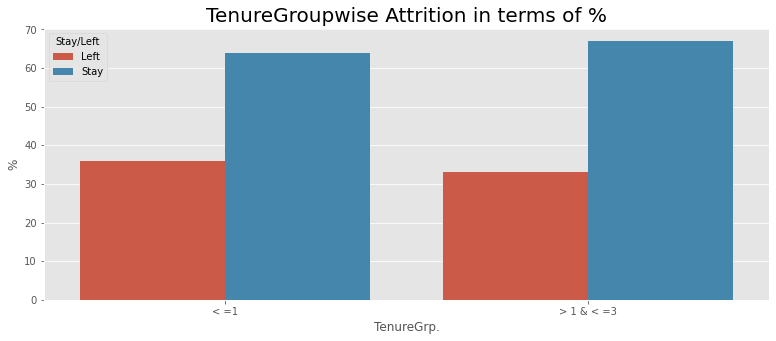

In [30]:
plt.figure(figsize = (13,5))
sns.barplot(x=df_TenureGroup_attrition['TenureGrp.'], y=df_TenureGroup_attrition['%'], hue = df_TenureGroup_attrition['Stay/Left']).set_title('TenureGroupwise Attrition in terms of %', fontsize=20)

<b>The above plot shows that higher percentage of people with tenure less than 1 year are leaving the company. </b>

In [31]:
# Lets check the attrition rate in terms of JobRoleMatch
df_JobRoleMatch_attrition = df.groupby(['JobRoleMatch', 'Stay/Left'])['name'].agg('count').reset_index()
df_JobRoleMatch_attrition.columns = ['JobRoleMatch', 'Stay/Left', 'counts']
df_JobRoleMatch_attrition.head()
# Calcuate the prcentage
df_JobRoleMatch_attrition['%'] = 100 * df_JobRoleMatch_attrition['counts'] / df_JobRoleMatch_attrition.groupby('JobRoleMatch')['counts'].transform('sum')
df_JobRoleMatch_attrition['%']=df_JobRoleMatch_attrition['%'].round()
df_JobRoleMatch_attrition

,JobRoleMatch,Stay/Left,counts,%
0,No,Left,284,68.0
1,No,Stay,131,32.0
2,Yes,Left,20,4.0
3,Yes,Stay,461,96.0


Text(0.5, 1.0, 'Attrition based on Job Role Match in terms of %')

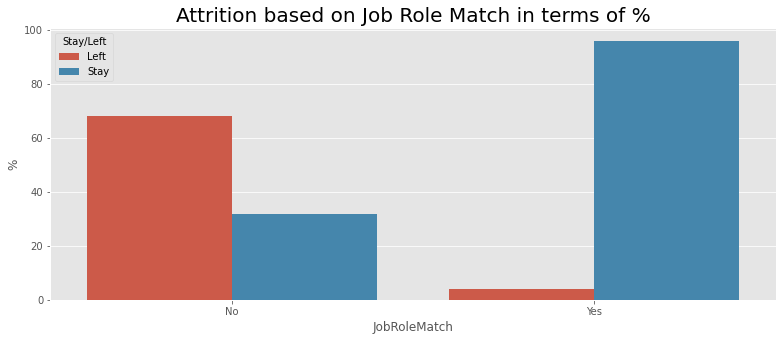

In [32]:
plt.figure(figsize = (13,5))
sns.barplot(x=df_JobRoleMatch_attrition['JobRoleMatch'], y=df_JobRoleMatch_attrition['%'], hue = df_JobRoleMatch_attrition['Stay/Left']).set_title('Attrition based on Job Role Match in terms of %', fontsize=20)

<b>The above plot shows that higher percentage of people who did not match the Job role are leaving the company. </b>

# Feature Engineering

In [33]:
df.head()

,tableid,name,phonenumber,Location,Emp.Group,Function,Gender,Tenure,TenureGrp.,Experience(YY.MM),MaritalStatus,AgeinYY.,HiringSource,Promoted/NonPromoted,JobRoleMatch,Stay/Left
0,1,sid,9876544345,Pune,B2,Operation,Male,0.00,< =1,6.08,Single,27.12,Direct,Non Promoted,Yes,Left
1,2,sid,9876544345,Noida,B7,Support,Male,0.00,< =1,13.00,Marr.,38.08,Direct,Promoted,No,Stay
2,3,sid,9876544345,Bangalore,B3,Operation,Male,0.01,< =1,16.05,Marr.,36.04,Direct,Promoted,Yes,Stay
3,4,sid,9876544345,Noida,B2,Operation,Male,0.01,< =1,6.06,Marr.,32.07,Direct,Promoted,Yes,Stay
4,5,sid,9876544345,Lucknow,B2,Operation,Male,0.00,< =1,7.00,Marr.,32.05,Direct,Non Promoted,Yes,Stay


The variables id, name, phoneNumber, JobRoleMatch are useless for the model building. So, we will drop these variables.

In [34]:
df = df.drop(['tableid', 'name', 'phonenumber','Tenure'],axis=1)

In [35]:
df[df['Stay/Left']=='Left']

,Location,Emp.Group,Function,Gender,TenureGrp.,Experience(YY.MM),MaritalStatus,AgeinYY.,HiringSource,Promoted/NonPromoted,JobRoleMatch,Stay/Left
0,Pune,B2,Operation,Male,< =1,6.08,Single,27.12,Direct,Non Promoted,Yes,Left
7,Bangalore,B2,Operation,Male,< =1,5.11,Marr.,30.11,Agency,Promoted,No,Left
8,Bangalore,B2,Operation,Male,< =1,6.04,Marr.,33.05,Agency,Promoted,No,Left
10,Noida,B1,Operation,Male,< =1,0.10,Single,27.10,Direct,Non Promoted,No,Left
12,Hyderabad,B2,Operation,Male,< =1,6.03,Single,30.01,Direct,Promoted,No,Left
...,...,...,...,...,...,...,...,...,...,...,...,...
889,Noida,B1,Operation,Male,> 1 & < =3,4.02,Single,27.01,Direct,Promoted,No,Left
890,Chennai,B1,Operation,Female,> 1 & < =3,2.00,Sep.,24.07,Direct,Promoted,No,Left
892,Vijayawada,B1,Operation,Female,< =1,3.06,Marr.,25.02,Direct,Promoted,No,Left
894,Vijayawada,B1,Operation,Male,< =1,0.03,Single,22.05,Direct,Non Promoted,No,Left


In [36]:
df['Location'].unique()

array(['Pune', 'Noida', 'Bangalore', 'Lucknow', 'Chennai', 'Hyderabad',
       'Nagpur', 'Madurai', 'Mumbai', 'Gurgaon', 'Kolkata', 'Vijayawada'],
      dtype=object)

In [37]:
# Checking the unique elements of the categorical variables
for i in df.select_dtypes('object').columns:
    print(f'The unique elements in {i} are {df[i].unique()}\n')

The unique elements in Location are ['Pune' 'Noida' 'Bangalore' 'Lucknow' 'Chennai' 'Hyderabad' 'Nagpur'
 'Madurai' 'Mumbai' 'Gurgaon' 'Kolkata' 'Vijayawada']

The unique elements in Emp.Group are ['B2' 'B7' 'B3' 'B1' 'B5' 'B0' 'B4' 'B6' 'C3' 'D2']

The unique elements in Function are ['Operation' 'Support' 'Sales']

The unique elements in Gender are ['Male' 'Female' 'other']

The unique elements in TenureGrp. are ['< =1' '> 1 & < =3']

The unique elements in MaritalStatus are ['Single' 'Marr.' 'Div.' 'NTBD' 'Sep.']

The unique elements in HiringSource are ['Direct' 'Agency' 'Employee Referral']

The unique elements in Promoted/NonPromoted are ['Non Promoted' 'Promoted']

The unique elements in JobRoleMatch are ['Yes' 'No']

The unique elements in Stay/Left are ['Left' 'Stay']



In [38]:
# lets labelEncode the variables 'Function', 'Gender', 'TenureGrp.','MaritalStatus', 'HiringSource','Promoted/NonPromoted', 'JobRoleMatch', 'Stay/Left'
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()


for i in ['Location', 'Emp.Group','Stay/Left', 'Function', 'Gender', 'TenureGrp.','MaritalStatus', 'HiringSource','Promoted/NonPromoted', 'JobRoleMatch']:
    df[i] = labelencoder.fit_transform(df[i])

In [39]:
# Checking the unique elements of the categorical variables
for i in df.columns:
    print(f'The unique elements in {i} are {df[i].unique()}\n')

The unique elements in Location are [10  9  0  5  1  3  8  6  7  2  4 11]

The unique elements in Emp.Group are [2 7 3 1 5 0 4 6 8 9]

The unique elements in Function are [0 2 1]

The unique elements in Gender are [1 0 2]

The unique elements in TenureGrp. are [0 1]

The unique elements in Experience(YY.MM) are [ 6.08 13.   16.05  6.06  7.    9.01  5.02  5.11  6.04 10.01  0.1   9.08
  6.03  6.09 11.02  4.09  5.1   4.03  0.03  1.1   3.03  4.04  8.04  8.03
  5.03  1.    3.11  6.1   7.04  9.07  2.04  9.04  2.03 15.04  0.04  1.08
  5.04  3.04 10.04  3.07 12.05  2.01  1.01  1.06  1.02  6.05  2.11  3.05
  4.06  1.03  8.06  1.07 17.06  3.1   1.05  5.   15.06 10.06  6.07  4.11
  3.06  0.09 12.07  7.06  2.07 13.1   1.09  8.01  0.07  5.07 10.07  5.01
  2.06  7.07  3.02  9.11  7.08  4.1   4.01  0.08  2.02  4.08  3.01  3.08
 15.03  5.05  9.09 25.08 11.04 10.09  8.09 12.09  5.09  6.01  9.02  8.11
 11.03  2.1   2.   11.    0.11  7.1   3.09  9.05  2.08  8.1   1.11  4.02
  7.09 12.08  4.    3.   11.11

In [40]:
df.head()

,Location,Emp.Group,Function,Gender,TenureGrp.,Experience(YY.MM),MaritalStatus,AgeinYY.,HiringSource,Promoted/NonPromoted,JobRoleMatch,Stay/Left
0,10,2,0,1,0,6.08,4,27.12,1,0,1,0
1,9,7,2,1,0,13.00,1,38.08,1,1,0,1
2,0,3,0,1,0,16.05,1,36.04,1,1,1,1
3,9,2,0,1,0,6.06,1,32.07,1,1,1,1
4,5,2,0,1,0,7.00,1,32.05,1,0,1,1


In [41]:
#df = pd.get_dummies(df, columns=['Function', 'Gender', 'TenureGrp.','MaritalStatus', 'HiringSource','Promoted/NonPromoted', 'JobRoleMatch'], drop_first=True)

In [42]:
df.head()

,Location,Emp.Group,Function,Gender,TenureGrp.,Experience(YY.MM),MaritalStatus,AgeinYY.,HiringSource,Promoted/NonPromoted,JobRoleMatch,Stay/Left
0,10,2,0,1,0,6.08,4,27.12,1,0,1,0
1,9,7,2,1,0,13.00,1,38.08,1,1,0,1
2,0,3,0,1,0,16.05,1,36.04,1,1,1,1
3,9,2,0,1,0,6.06,1,32.07,1,1,1,1
4,5,2,0,1,0,7.00,1,32.05,1,0,1,1


In [43]:
df.shape

(896, 12)

In [44]:
X = df.drop('Stay/Left',axis=1)
y = df['Stay/Left']

<AxesSubplot:xlabel='Stay/Left', ylabel='count'>

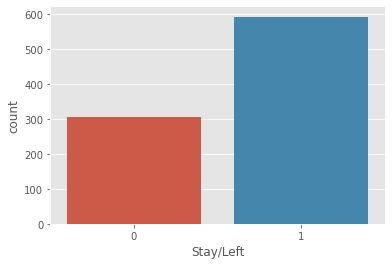

In [45]:
sns.countplot(y)

The target variable is imbalanced. So, we need to balance the target variable.

In [46]:
#Handling the imbalanced data

#lets balance the class using the Smoteen sampling technique
from imblearn.combine import SMOTEENN
#defining the model
sn=SMOTEENN(random_state=0)
#Training the model
sn.fit(X,y)

#making the samples
X,y=sn.fit_resample(X,y)


<AxesSubplot:xlabel='Stay/Left', ylabel='count'>

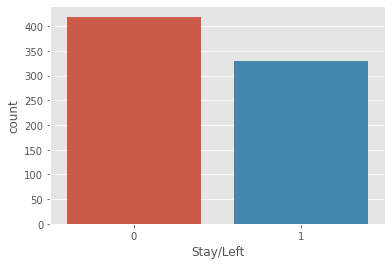

In [47]:
sns.countplot(y)

In [48]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [49]:
print(f'The shape of X_train is {X_train.shape}')
print(f'The shape of X_test is {X_test.shape}')
print(f'The shape of y_train is {y_train.shape}')
print(f'The shape of y_test is {y_test.shape}')

The shape of X_train is (598, 11)
The shape of X_test is (150, 11)
The shape of y_train is (598,)
The shape of y_test is (150,)


In [50]:
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

In [51]:
model=[]
model.append(('LogisticRegression',LogisticRegression()))

model.append(('Naive bayes',GaussianNB()))

model.append(('KNN',KNeighborsClassifier()))

model.append(('RandomForest',RandomForestClassifier()))



In [52]:
from sklearn.metrics import accuracy_score
for name,model in model:
    print(name)
    model.fit(X_train,y_train)
 
    predictions=model.predict(X_test)
    from sklearn.metrics import confusion_matrix 
    print(confusion_matrix(predictions,y_test))
    print('\n')
    print(accuracy_score(predictions,y_test))
    print('\n')

LogisticRegression
[[78  1]
 [ 2 69]]


0.98


Naive bayes
[[73  1]
 [ 7 69]]


0.9466666666666667


KNN
[[79  5]
 [ 1 65]]


0.96


RandomForest
[[78  1]
 [ 2 69]]


0.98




In [53]:
from sklearn.model_selection import RandomizedSearchCV

n_estimators=[int(x) for x in np.linspace(
    start=100,
    stop=1200,
    num=6)]
max_depth=[int(x) for x in np.linspace(
    start=5,
    stop=35,
    num=4)]

In [54]:
random_grid={'n_estimators':n_estimators,'max_depth':max_depth,
            'max_features':['auto','sqrt'],'min_samples_split':[5,10,15,20]}

CV_model=RandomizedSearchCV(
    estimator=RandomForestClassifier(),
    param_distributions=random_grid,
    n_jobs=-1,
    cv=3,
    verbose=2
    )

CV_model.fit(X_train,y_train)

CV_model.best_params_

prediction=CV_model.predict(X_test)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


In [55]:
print(confusion_matrix(predictions,y_test))
print('\n')
print(accuracy_score(predictions,y_test))
print('\n')

[[78  1]
 [ 2 69]]


0.98




In [56]:
#import pickle
#with open('Attrition_saved_model','wb') as file:
#	pickle.dump(CV_model,file)

In [57]:
X_train.columns

Index(['Location', 'Emp.Group', 'Function', 'Gender', 'TenureGrp.',
       'Experience(YY.MM)', 'MaritalStatus', 'AgeinYY.', 'HiringSource',
       'Promoted/NonPromoted', 'JobRoleMatch'],
      dtype='object')